## Supply Chain Shipment Type Prediction
Given supply chain data, let's try to predict the `mode of transport` for a given shipment.


We will use classcial ML algorithms and also apply TensorFlow/Keras neural network to make our predictions.

## Getting started by importing useful libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

import tensorflow as tf 

from sklearn.metrics import confusion_matrix, classification_report


In [2]:
data = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [3]:
data['Line Item Value']

0            551.00
1           6200.00
2          40000.00
3         127360.80
4         121600.00
            ...    
10319     599655.60
10320     137389.44
10321    5140114.74
10322     113871.80
10323      72911.61
Name: Line Item Value, Length: 10324, dtype: float64

In [4]:
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [5]:
data.head().T

,0,1,2,3,4
ID,1,3,4,15,16
Project Code,100-CI-T01,108-VN-T01,100-CI-T01,108-VN-T01,108-VN-T01
PQ #,Pre-PQ Process,Pre-PQ Process,Pre-PQ Process,Pre-PQ Process,Pre-PQ Process
PO / SO #,SCMS-4,SCMS-13,SCMS-20,SCMS-78,SCMS-81
ASN/DN #,ASN-8,ASN-85,ASN-14,ASN-50,ASN-55
Country,Côte d'Ivoire,Vietnam,Côte d'Ivoire,Vietnam,Vietnam
Managed By,PMO - US,PMO - US,PMO - US,PMO - US,PMO - US
Fulfill Via,Direct Drop,Direct Drop,Direct Drop,Direct Drop,Direct Drop
Vendor INCO Term,EXW,EXW,FCA,EXW,EXW
Shipment Mode,Air,Air,Air,Air,Air


In [6]:
data.columns, len(data.columns)

(Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
        'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
        'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
        'Scheduled Delivery Date', 'Delivered to Client Date',
        'Delivery Recorded Date', 'Product Group', 'Sub Classification',
        'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
        'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
        'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
        'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
        'Line Item Insurance (USD)'],
       dtype='object'),
 33)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

# EDA

## Shipment Mode % wise Pie Chart

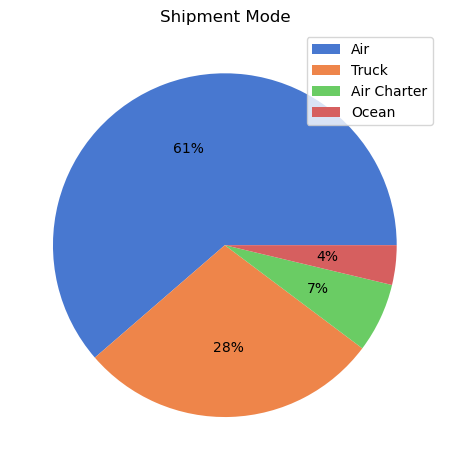

In [8]:
shipping_mode = data['Shipment Mode'].value_counts()
labels = shipping_mode.index
sizes = (shipping_mode / shipping_mode.sum()) * 100
palette_color = sns.color_palette('muted')
fig, ax = plt.subplots()
# plotting data on chart
plt.pie(shipping_mode, colors=palette_color, autopct='%.0f%%')
plt.legend(labels)
plt.title('Shipment Mode')
plt.tight_layout()
plt.show();


### Majorly 4 types of shipment mode is available and air is the highest

## Top 10 Manufacturing Site for all shipment mode with graph

                                   0
Manufacturing Site                  
Aurobindo Unit III, India       3172
Mylan (formerly Matrix) Nashik  1415
Hetero Unit III Hyderabad IN     869
Cipla, Goa, India                665
Strides, Bangalore, India.       540
Alere Medical Co., Ltd.          481
Trinity Biotech, Plc             405
ABBVIE Ludwigshafen Germany      366
Inverness Japan                  345
ABBVIE (Abbott) Logis. UK        219


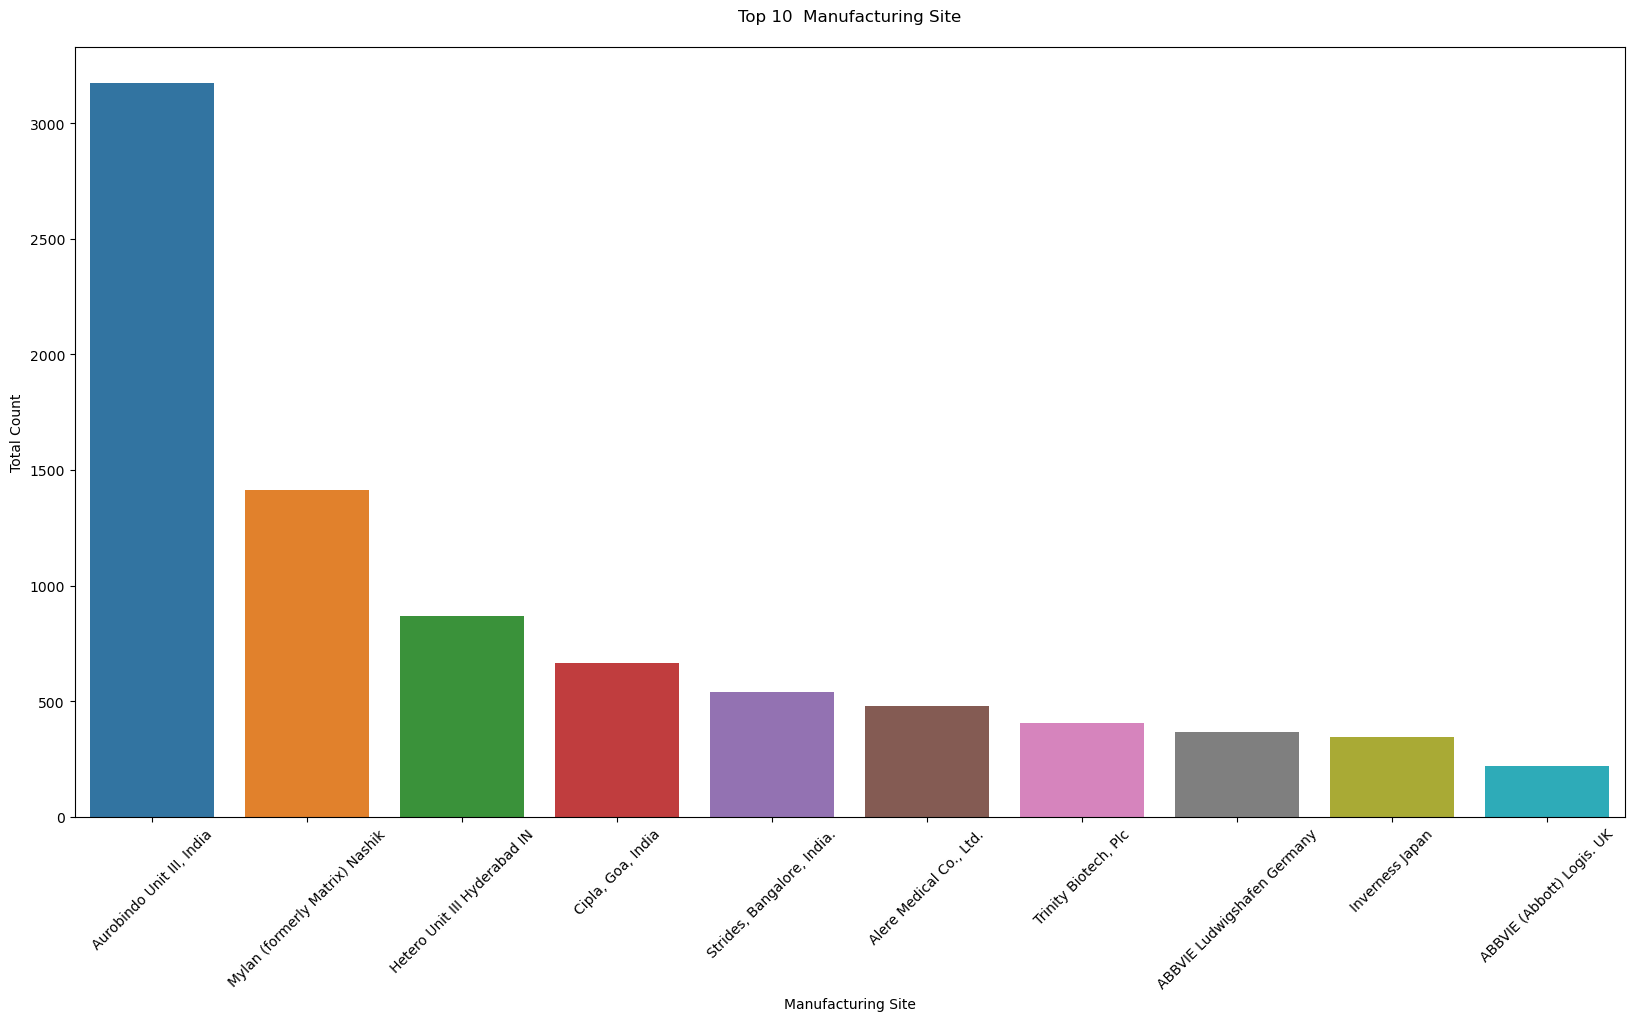

In [9]:
all_data = data.groupby('Manufacturing Site')
all_data_count = all_data.size().nlargest(10)
print(all_data_count.to_frame())
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = list(all_data_count.keys()), y=all_data_count)

plt.title('Top 10  Manufacturing Site\n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site')
plt.xticks(rotation=45)
plt.show();

## Top 10 Manufacturing site for Air shipment mode with graph

                                Manufacturing Site
Aurobindo Unit III, India                     1694
Mylan (formerly Matrix) Nashik                 695
Alere Medical Co., Ltd.                        473
Hetero Unit III Hyderabad IN                   417
Trinity Biotech, Plc                           383
Inverness Japan                                320
ABBVIE Ludwigshafen Germany                    285
Cipla, Goa, India                              274
Strides, Bangalore, India.                     256
ABBVIE (Abbott) Logis. UK                      150


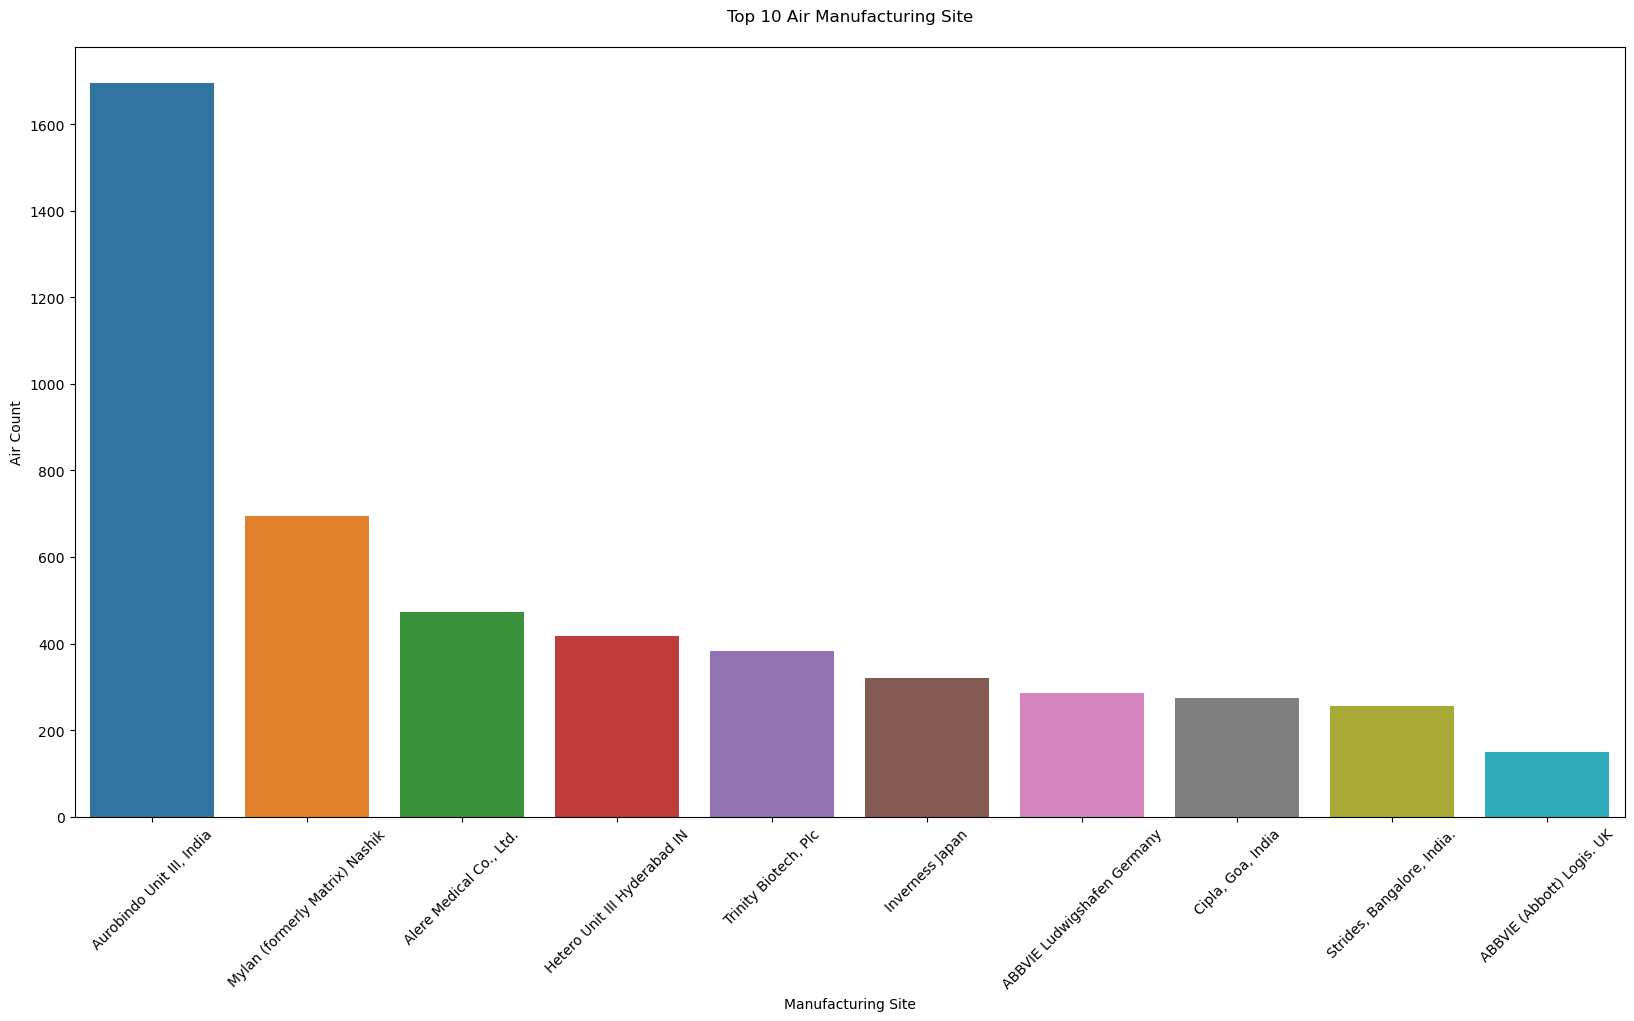

In [10]:
air_data = data[data['Shipment Mode']=='Air']
air_data_count = air_data['Manufacturing Site'].value_counts()[0:10]
print(air_data_count.to_frame())
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = list(air_data_count.keys()), y=air_data_count)

plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')
plt.xticks(rotation=45)
plt.show();

## Conclusion
1. Top shipping mode is `Air`
2. Top Manufacturing Site : `Aurobindo Unit III, India - 3172`
3. Top Air Manufacturing Site : `Aurobindo Unit III, India - 1694`


## Preprocessing

In [22]:
def preprocess_inputs(df, label_mapping):
    df = df.copy()
    
    # Dropping ID column as it shows only alloted no.
    df = df.drop('ID', axis=1)
    
    # Dropping missing target rows
    missing_rows = df[df['Shipment Mode'].isna()].index
    df = df.drop(missing_rows, axis=0).reset_index(drop=True)
    
    # Fill the missing values
    df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])
    df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())
    
    # Dropping date columns having too many  missing values
    df = df.drop(['PQ First Sent to Client Date', 'PO Sent to Vendor Date'], axis=1)
    
    # Now performing feature engineering in data columns
    for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        df[column] = pd.to_datetime(df[column])
        df[column + 'Year'] = df[column].apply(lambda x:x.year)
        df[column + 'Month'] = df[column].apply(lambda x:x.month)
        df[column + 'Day'] = df[column].apply(lambda x:x.day)
        # now removing the original column
        df = df.drop(column, axis=1)
        
    # Dropping the numeric columns with too many missing values
    df = df.drop(['Weight (Kilograms)', 'Freight Cost (USD)'], axis=1)
    
    # Dropping the high-cardinality columns
    df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis=1)
    
    # Binary encoding 
    df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop': 0, 'From RDC': 1})
    df['First Line Designation'] = df['First Line Designation'].replace({'No': 0, 'Yes': 1})
     
    # One hot encoding for more the two unique values
    for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
        
    # Splitting data into X and y
    y = df['Shipment Mode']
    X = df.drop('Shipment Mode', axis=1)
   
    # Encoding the lables 
    y = y.replace(label_mapping)
    
    # Train Test spilit
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    # Scaling our X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
   
    

In [23]:
LABEL_MAPPING = {
    'Air': 0,
    'Truck': 1,
    'Air Charter': 2,
    'Ocean': 3
}

X_train, X_test, y_train, y_test = preprocess_inputs(df=data, label_mapping=LABEL_MAPPING)

In [24]:
LABEL_MAPPING.values(), LABEL_MAPPING.keys()


(dict_values([0, 1, 2, 3]),
 dict_keys(['Air', 'Truck', 'Air Charter', 'Ocean']))

In [25]:
          ## checking the missing values in dataframes##
#--------------------------------------------------------------------

#missing_rows = data[data['Shipment Mode'].isna()].index
#len(missing_rows)
#----------------------------------------------------------------------


#data['Dosage'] .
#data['Dosage'].isna().sum()

#this column contains some specific value which i donot 
#have any idea so i preffered mode method to fill this.
#----------------------------------------------------------------------

#data['Line Item Insurance (USD)']
#data['Line Item Insurance (USD)'].isna().sum()
#data['Line Item Insurance (USD)'].mean()

#having some premium so i choose to fill with mean value.
#--------------------------------------------------------------------


#data[['PQ First Sent to Client Date', 'PO Sent to Vendor Date','Scheduled Delivery Date'
     #,'Delivered to Client Date', 'Delivery Recorded Date']]

# dropping date column which having too much missing values
#--------------------------------------------------------------------


#data.isna().sum()
# dropping numeric columns with too many missing values
#-------------------------------------------------------------------

#data.nunique()
# dropping high-cardinality columns as these columns not making any sense.
#--------------------------------------------------------------------


#data['Fulfill Via'].value_counts()
#data['First Line Designation'].value_counts()
#ideal case for binary encoding
#--------------------------------------------------------------------










In [26]:
X_train

,Fulfill Via,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery DateYear,Scheduled Delivery DateMonth,...,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
8905,0.975074,-0.228739,-0.426393,-0.442833,-0.365576,-0.221030,0.673216,-0.471452,1.087860,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1414,0.975074,-0.228739,0.198248,0.418854,-0.218907,-0.172736,0.673216,0.702302,-0.994006,0.456201,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1409,0.975074,-0.228739,0.532553,0.366882,-0.309884,-0.203468,0.673216,0.632237,-0.994006,-0.152532,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,4.125612,-0.197963,-0.011975,-0.023956
874,-1.025563,0.291362,-0.450154,-0.274234,2.493413,0.354098,0.673216,-0.278564,-1.410379,-1.674365,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,5.051446,-0.011975,-0.023956
1941,0.975074,-0.618816,0.159722,0.338381,-0.227409,-0.093711,0.673216,0.593803,-0.994006,-0.456899,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-1.025563,-0.228739,-0.407975,-0.436590,-0.377267,-0.225420,-1.485408,-0.467031,1.087860,1.064934,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
7813,0.975074,-0.228739,-0.005566,-0.331187,-0.409364,-0.238591,0.673216,-0.358993,0.255114,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
905,-1.025563,-0.618816,1.611276,2.247912,-0.223796,-0.093711,0.673216,2.497515,-1.410379,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
5192,-1.025563,0.291362,-0.281635,1.413370,1.430592,0.134584,0.673216,2.296044,-0.577633,1.369300,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956


In [27]:
y_train.value_counts()

0    4317
1    1950
2     449
3     258
Name: Shipment Mode, dtype: int64

## Training our data for model

In [28]:
X_train.shape

(6974, 771)

In [29]:
inputs =tf.keras.Input(shape=(771,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32,
                    epochs=100, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                           patience=3,
                                                                           restore_best_weights=True)])

                    

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.8236 - val_loss: 0.3241 - val_accuracy: 0.8767
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9064 - val_loss: 0.3020 - val_accuracy: 0.8860
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9168 - val_loss: 0.2903 - val_accuracy: 0.8824
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.9229 - val_loss: 0.2838 - val_accuracy: 0.8925
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9305 - val_loss: 0.2929 - val_accuracy: 0.9025
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9317 - val_loss: 0.2876 - val_accuracy: 0.9018
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9367 - val_loss: 0.3322 - val_accuracy: 0.8839

## Output of the deep learning model

94/94 [==============================] - 0s 1ms/step
(2990, 1)
test set accuracy: 88.76%


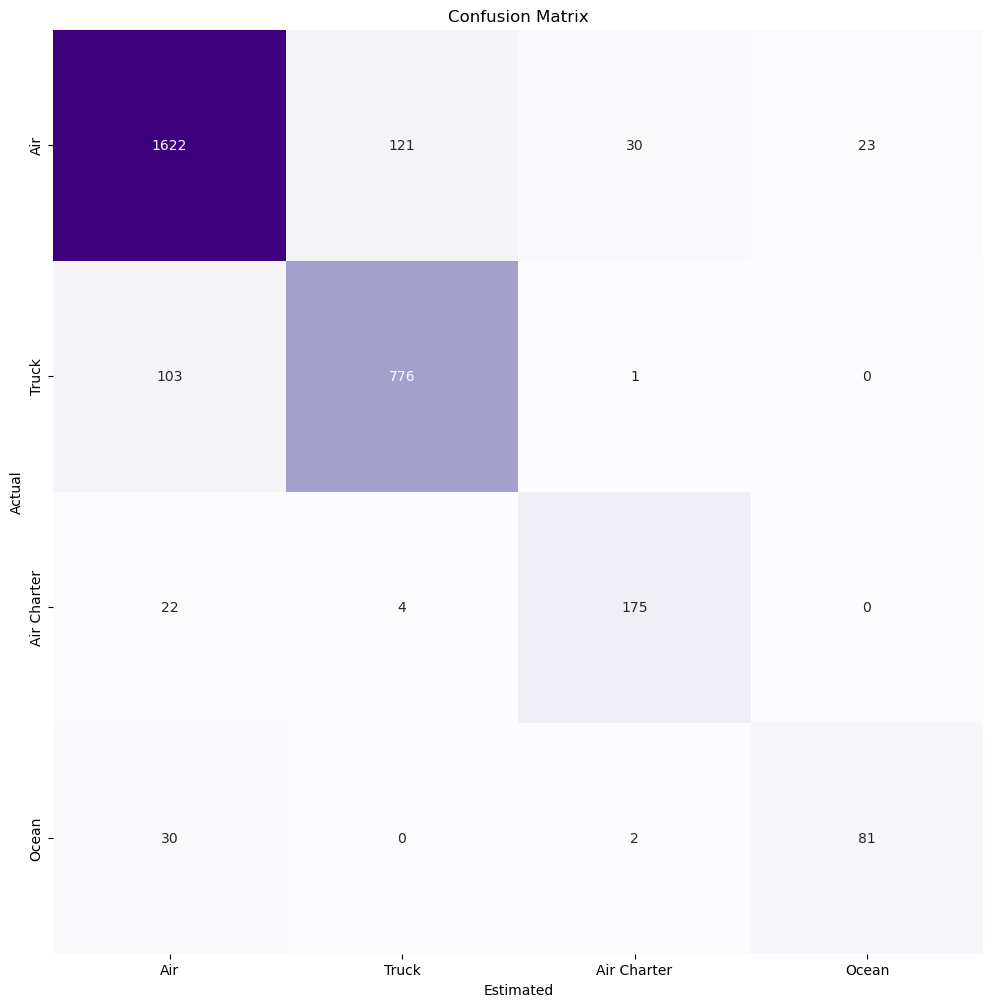

Classification Report:
----------------------
               precision    recall  f1-score   support

         Air       0.91      0.90      0.91      1796
       Truck       0.86      0.88      0.87       880
 Air Charter       0.84      0.87      0.86       201
       Ocean       0.78      0.72      0.75       113

    accuracy                           0.89      2990
   macro avg       0.85      0.84      0.85      2990
weighted avg       0.89      0.89      0.89      2990



In [30]:
y_pred = np.argmax(model.predict(X_test), axis=1)

y_pred.resize((len(y_pred), 1))
print(y_pred.shape)
Confusion_Matrix = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAPPING.values()))

Classification_Report = classification_report(y_test, y_pred, labels=list(LABEL_MAPPING.values()),
                                             target_names=list(LABEL_MAPPING.keys()))

print("test set accuracy: {:.2f}%".format(model.evaluate(X_test, y_test,
                                                        verbose=0)[1] * 100))

plt.figure(figsize=(12, 12))

sns.heatmap(Confusion_Matrix, annot=True, fmt='g', vmin=0, cmap='Purples', cbar=False)

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))

plt.xlabel('Estimated')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:\n----------------------\n", Classification_Report)

